In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# original dataframe

csv_path="school_financing_2012_2016.csv"
finance_data=pd.read_csv(csv_path)
finance_df.head()

Year       State  Total Revenue  Revenue from federal sources  \
0  2016     Alabama      7497291.0                      797631.0   
1  2016      Alaska      2494680.0                      307320.0   
2  2016     Arizona      8430089.0                     1160908.0   
3  2016    Arkansas      5384115.0                      593656.0   
4  2016  California     86557167.0                     7709079.0   

   Revenue from state sources  Revenue from local sources  Total expenditures  \
0                   4097696.0                   2601964.0           7698841.0   
1                   1613675.0                    573685.0           2623014.0   
2                   3440726.0                   3828455.0           7984562.0   
3                   4122377.0                    668082.0           5407470.0   
4                  50904567.0                  27943521.0          82153002.0   

   Current spending  Capital outlay  Other expenditures  Outstanding Debt  \
0         6907539.0        610743.0            180559.0         5810828.0   
1         2327151.0        255041.0             40822.0         1372527.0   
2         7276067.0        528694.0            179801.0         5041714.0   
3         4750938.0        518181.0            138351.0         4263573.0   
4        72641244.0       6786142.0           2725616.0        63166228.0   

   Cash and securities  Enrollment  
0            2295759.0      734652  
1                  NaN      132477  
2            2574408.0      938274  
3            1709251.0      479177  
4           42281483.0     6217031

In [186]:
# creating a new "per pupil" dataframe by dividing all columns by # of enrolled students

finance_pp_df=finance_df[["Year","State"]]
key_list=finance_df.keys().tolist()
key_list.remove("Year")
key_list.remove("State")
key_list.remove("Enrollment")
for idx, key in enumerate(key_list):
    column=finance_df.loc[:,key_list[idx]]/finance_df.loc[:,"Enrollment"]
    finance_pp_df.loc[:,key]=column.values
finance_pp_df.head()

Year       State  Total Revenue  Revenue from federal sources  \
0  2016     Alabama      10.205228                      1.085726   
1  2016      Alaska      18.831042                      2.319799   
2  2016     Arizona       8.984677                      1.237280   
3  2016    Arkansas      11.236172                      1.238908   
4  2016  California      13.922589                      1.239994   

   Revenue from state sources  Revenue from local sources  Total expenditures  \
0                    5.577737                    3.541764           10.479575   
1                   12.180794                    4.330450           19.799769   
2                    3.667080                    4.080317            8.509840   
3                    8.603036                    1.394228           11.284911   
4                    8.187922                    4.494673           13.214186   

   Current spending  Capital outlay  Other expenditures  Outstanding Debt  \
0          9.402464        0.831336            0.245775          7.909633   
1         17.566453        1.925172            0.308144         10.360493   
2          7.754736        0.563475            0.191630          5.373392   
3          9.914787        1.081398            0.288726          8.897700   
4         11.684234        1.091541            0.438411         10.160192   

   Cash and securities  
0             3.124961  
1                  NaN  
2             2.743770  
3             3.567056  
4             6.800912

In [187]:
#loop creating a dictionary of dataframes for each state. call state's dataframe using state_pp_dfs["state name"]

states_pp_list=finance_pp_df["State"].unique().tolist()
state_pp_dfs={state:finance_pp_df.loc[(finance_pp_df["State"] == state),:] for state in states_list}
state_pp_dfs["Alaska"]

Year   State  Total Revenue  Revenue from federal sources  \
1    2016  Alaska      18.831042                      2.319799   
52   2015  Alaska      22.338465                      2.631723   
103  2014  Alaska      20.403772                      2.371130   
154  2013  Alaska      19.414575                      2.448208   
205  2012  Alaska      18.225769                      2.691767   

     Revenue from state sources  Revenue from local sources  \
1                     12.180794                    4.330450   
52                    15.498872                    4.207870   
103                   13.975693                    4.056948   
154                   13.024914                    3.941453   
205                   11.530943                    4.003059   

     Total expenditures  Current spending  Capital outlay  Other expenditures  \
1             19.799769         17.566453        1.925172            0.308144   
52            22.701549         20.238041        2.156048            0.307461   
103           20.890738         18.504922        2.061507            0.324309   
154           20.336507         18.264076        1.895668            0.176763   
205           18.989837         17.477246        1.110483            0.402108   

     Outstanding Debt  Cash and securities  
1           10.360493                  NaN  
52          10.417919                  NaN  
103          9.749646                  NaN  
154         10.080044                  NaN  
205          8.231772                  NaN

In [191]:
#creating a new dataframe of only states with no legalized marijuana
no_mj_states=["Idaho","Wyoming","South Dakota","Nebraska", "Texas", "Kansas", "Iowa","Wisconsin","Indiana","Kentucky","Tennessee","Virginia","North Carolina","South Carolina","Georgia", "Alabama","Mississippi"]
no_mj_states_pp_df=finance_pp_df.loc[(finance_pp_df["State"].isin(no_mj_states)),:]
no_mj_states_pp_df.head()

Year    State  Total Revenue  Revenue from federal sources  \
0   2016  Alabama      10.205228                      1.085726   
10  2016  Georgia      11.232736                      1.046486   
12  2016    Idaho       8.243847                      0.874378   
14  2016  Indiana      12.477100                      0.952270   
15  2016     Iowa      13.080250                      0.915038   

    Revenue from state sources  Revenue from local sources  \
0                     5.577737                    3.541764   
10                    5.078610                    5.107639   
12                    5.293197                    2.076271   
14                    7.759791                    3.765039   
15                    7.053219                    5.111993   

    Total expenditures  Current spending  Capital outlay  Other expenditures  \
0            10.479575          9.402464        0.831336            0.245775   
10           11.086698          9.911689        1.062349            0.112660   
12            7.644125          7.174121        0.272630            0.197374   
14           11.284224          9.932992        0.984093            0.367139   
15           13.209664         11.208975        1.751127            0.249562   

    Outstanding Debt  Cash and securities  
0           7.909633             3.124961  
10          2.629740             3.715924  
12          4.950959             2.932759  
14         10.296072             4.308379  
15          7.423301             6.105857

In [192]:
#groupby dataframe of states with no MJ by year, then visualize groupby using mean
no_mj_states_pp_groupby_year=no_mj_states_pp_df.groupby("Year")
no_mj_pp_df=no_mj_states_pp_groupby_year.mean()
no_mj_pp_df

Total Revenue  Revenue from federal sources  Revenue from state sources  \
Year                                                                            
2012      11.003582                      1.223029                    5.219903   
2013      11.017431                      1.106821                    5.382665   
2014      11.238038                      1.061290                    5.532719   
2015      11.618675                      1.093017                    5.849974   
2016      11.933976                      1.092259                    6.013047   

      Revenue from local sources  Total expenditures  Current spending  \
Year                                                                     
2012                    4.560650           10.997012          9.647991   
2013                    4.527945           11.039603          9.738551   
2014                    4.644030           11.241041          9.877642   
2015                    4.675683           11.633035         10.080034   
2016                    4.828669           11.955700         10.280216   

      Capital outlay  Other expenditures  Outstanding Debt  \
Year                                                         
2012        1.041729            0.307291          6.964573   
2013        0.992819            0.308233          7.112470   
2014        1.058549            0.304850          7.333668   
2015        1.241178            0.311824          7.567210   
2016        1.372051            0.303433          7.689141   

      Cash and securities  
Year                       
2012             3.804254  
2013             3.880830  
2014             4.072491  
2015             4.321100  
2016             4.434960

In [188]:
x_axis=finance_df["Year"].unique().tolist()

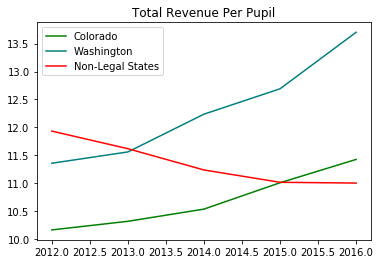

In [207]:
plt.plot(x_axis, state_pp_dfs["Colorado"]["Total Revenue"], label="Colorado", color='green')
plt.plot(x_axis, state_pp_dfs["Washington"]["Total Revenue"], label="Washington", color='teal')
plt.plot(x_axis, no_mj_pp_df["Total Revenue"], label="Non-Legal States", color='red')
plt.legend()
plt.title("Total Revenue Per Pupil")

plt.show()

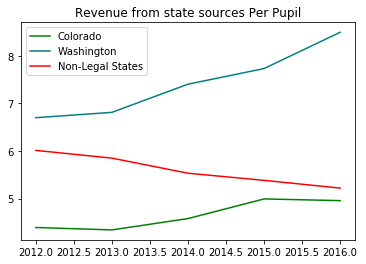

In [205]:
plt.plot(x_axis, state_pp_dfs["Colorado"]["Revenue from state sources"], label="Colorado", color='green')
plt.plot(x_axis, state_pp_dfs["Washington"]["Revenue from state sources"], label="Washington", color='teal')
plt.plot(x_axis, no_mj_pp_df["Revenue from state sources"], label="Non-Legal States", color='red')
plt.legend()
plt.title("Revenue from state sources Per Pupil")

plt.show()

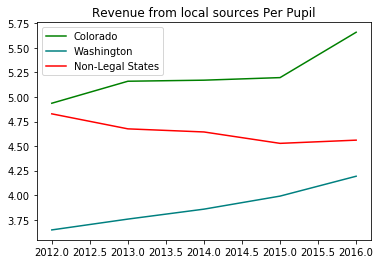

In [206]:
plt.plot(x_axis, state_pp_dfs["Colorado"]["Revenue from local sources"], label="Colorado", color='green')
plt.plot(x_axis, state_pp_dfs["Washington"]["Revenue from local sources"], label="Washington", color='teal')
plt.plot(x_axis, no_mj_pp_df["Revenue from local sources"], label="Non-Legal States", color='red')
plt.legend()
plt.title("Revenue from local sources Per Pupil")

plt.show()

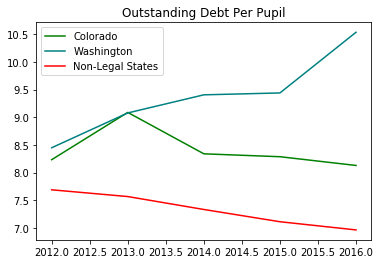

In [208]:
plt.plot(x_axis, state_pp_dfs["Colorado"]["Outstanding Debt"], label="Colorado", color='green')
plt.plot(x_axis, state_pp_dfs["Washington"]["Outstanding Debt"], label="Washington", color='teal')
plt.plot(x_axis, no_mj_pp_df["Outstanding Debt"], label="Non-Legal States", color='red')
plt.legend()
plt.title("Outstanding Debt Per Pupil")

plt.show()

In [60]:
states_list=finance_df["State"].unique().tolist()
state_dfs={state:finance_df.loc[(finance_df["State"] == state),:] for state in states_list}
state_dfs["Alaska"]

Year   State  Total Revenue  Revenue from federal sources  \
1    2016  Alaska      2494680.0                      307320.0   
52   2015  Alaska      2920866.0                      344111.0   
103  2014  Alaska      2663488.0                      309525.0   
154  2013  Alaska      2545076.0                      320938.0   
205  2012  Alaska      2383402.0                      352005.0   

     Revenue from state sources  Revenue from local sources  \
1                     1613675.0                    573685.0   
52                    2026555.0                    550200.0   
103                   1824373.0                    529590.0   
154                   1707449.0                    516689.0   
205                   1507913.0                    523484.0   

     Total expenditures  Current spending  Capital outlay  Other expenditures  \
1             2623014.0         2327151.0        255041.0             40822.0   
52            2968341.0         2646225.0        281914.0             40202.0   
103           2727056.0         2415614.0        269107.0             42335.0   
154           2665933.0         2394256.0        248505.0             23172.0   
205           2483320.0         2285517.0        145219.0             52584.0   

     Outstanding Debt  Cash and securities Enrollment  
1           1372527.0                  NaN    132,477  
52          1362195.0                  NaN    130,755  
103         1272709.0                  NaN    130,539  
154         1321403.0                  NaN    131,091  
205         1076477.0                  NaN    130,771

In [189]:
no_mj_states=["Idaho","Wyoming","South Dakota","Nebraska", "Texas", "Kansas", "Iowa","Wisconsin","Indiana","Kentucky","Tennessee","Virginia","North Carolina","South Carolina","Georgia", "Alabama","Mississippi"]
no_mj_states_df=finance_df.loc[(finance_df["State"].isin(no_mj_states)),:]
no_mj_states_df

Year           State  Total Revenue  Revenue from federal sources  \
0    2016         Alabama      7497291.0                      797631.0   
10   2016         Georgia     19399889.0                     1807371.0   
12   2016           Idaho      2265813.0                      240322.0   
14   2016         Indiana     12510738.0                      954837.0   
15   2016            Iowa      6644950.0                      464852.0   
16   2016          Kansas      6067808.0                      453922.0   
17   2016        Kentucky      7744812.0                      880296.0   
24   2016     Mississippi      4743998.0                      690724.0   
27   2016        Nebraska      4319834.0                      346826.0   
33   2016  North Carolina     13448045.0                     1557900.0   
40   2016  South Carolina      9149576.0                      840786.0   
41   2016    South Dakota      1452424.0                      196644.0   
42   2016       Tennessee      9558955.0                     1095415.0   
43   2016           Texas     58102045.0                     5953348.0   
46   2016        Virginia     15977316.0                     1058146.0   
49   2016       Wisconsin     11325800.0                      782610.0   
50   2016         Wyoming      2041958.0                      123012.0   
51   2015         Alabama      7358479.0                      795238.0   
61   2015         Georgia     18580802.0                     1831221.0   
63   2015           Idaho      2167326.0                      232449.0   
65   2015         Indiana     12214546.0                      929878.0   
66   2015            Iowa      6452929.0                      458457.0   
67   2015          Kansas      5990196.0                      475273.0   
68   2015        Kentucky      7547768.0                      848963.0   
75   2015     Mississippi      4580037.0                      672366.0   
78   2015        Nebraska      4156275.0                      344382.0   
84   2015  North Carolina     13146934.0                     1589570.0   
91   2015  South Carolina      8747944.0                      836137.0   
92   2015    South Dakota      1412443.0                      206853.0   
93   2015       Tennessee      9433434.0                     1123413.0   
..    ...             ...            ...                           ...   
168  2013            Iowa      6030006.0                      459132.0   
169  2013          Kansas      5665784.0                      420820.0   
170  2013        Kentucky      7215016.0                      867735.0   
177  2013     Mississippi      4433018.0                      707522.0   
180  2013        Nebraska      3794639.0                      366241.0   
186  2013  North Carolina     12729402.0                     1579889.0   
193  2013  South Carolina      8241948.0                      814137.0   
194  2013    South Dakota      1314331.0                      194731.0   
195  2013       Tennessee      8977376.0                     1165801.0   
196  2013           Texas     49566997.0                     5695947.0   
199  2013        Virginia     15058548.0                     1108879.0   
202  2013       Wisconsin     10801895.0                      827432.0   
203  2013         Wyoming      1693178.0                      113501.0   
204  2012         Alabama      7135105.0                      789954.0   
214  2012         Georgia     17556060.0                     1862297.0   
216  2012           Idaho      1981212.0                      266087.0   
218  2012         Indiana     12142555.0                     1096902.0   
219  2012            Iowa      6031265.0                      512246.0   
220  2012          Kansas      5612118.0                      410051.0   
221  2012        Kentucky      7191188.0                      983232.0   
228  2012     Mississippi      4466518.0                      795110.0   
231  2012        Nebraska      3691601.0                      366016.0   
237  2012

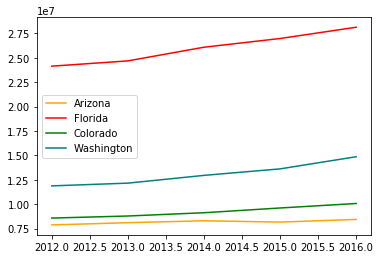

In [39]:
arizona_total_revenue,= plt.plot(x_axis, state_dfs["Arizona"]["Total Revenue"], label="Arizona", color="orange")
florida_total_revenue,= plt.plot(x_axis, state_dfs["Florida"]["Total Revenue"], label="Florida", color="red")
colorado_total_revenue,= plt.plot(x_axis, state_dfs["Colorado"]["Total Revenue"], label="Colorado", color="green")
washington_total_revenue,= plt.plot(x_axis, state_dfs["Washington"]["Total Revenue"], label="Washington", color="teal")

plt.legend(handles=[arizona_total_revenue,florida_total_revenue,colorado_total_revenue,washington_total_revenue])
plt.show()

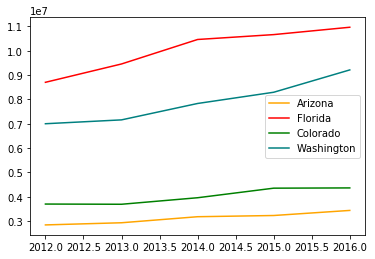

In [38]:
arizona_revenue_states,= plt.plot(x_axis, state_dfs["Arizona"]["Revenue from state sources"], label="Arizona", color="orange")
florida_revenue_states,= plt.plot(x_axis, state_dfs["Florida"]["Revenue from state sources"], label="Florida", color="red")
colorado_revenue_states,= plt.plot(x_axis, state_dfs["Colorado"]["Revenue from state sources"], label="Colorado", color="green")
washington_revenue_states,= plt.plot(x_axis, state_dfs["Washington"]["Revenue from state sources"], label="Washington", color="teal")

plt.legend(handles=[arizona_revenue_states,florida_revenue_states,colorado_revenue_states,washington_revenue_states])
plt.show()

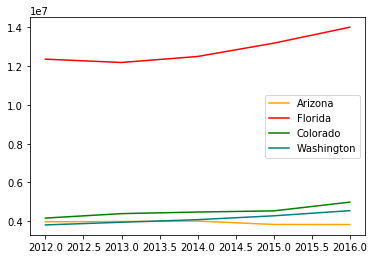

In [37]:
arizona_revenue_local,= plt.plot(x_axis, state_dfs["Arizona"]["Revenue from local sources"], label="Arizona", color="orange")
florida_revenue_local,= plt.plot(x_axis, state_dfs["Florida"]["Revenue from local sources"], label="Florida", color="red")
colorado_revenue_local,= plt.plot(x_axis, state_dfs["Colorado"]["Revenue from local sources"], label="Colorado", color="green")
washington_revenue_local,= plt.plot(x_axis, state_dfs["Washington"]["Revenue from local sources"], label="Washington", color="teal")

plt.legend(handles=[arizona_revenue_local,florida_revenue_local,colorado_revenue_local,washington_revenue_local])
plt.show()

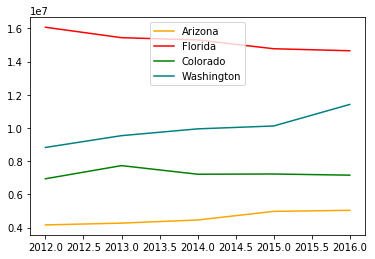

In [36]:
arizona_outstanding_debt,= plt.plot(x_axis, state_dfs["Arizona"]["Outstanding Debt"], label="Arizona", color="orange")
florida_outstanding_debt,= plt.plot(x_axis, state_dfs["Florida"]["Outstanding Debt"], label="Florida", color="red")
colorado_outstanding_debt,= plt.plot(x_axis, state_dfs["Colorado"]["Outstanding Debt"], label="Colorado", color="green")
washington_outstanding_debt,= plt.plot(x_axis, state_dfs["Washington"]["Outstanding Debt"], label="Washington", color="teal")

plt.legend(handles=[arizona_outstanding_debt,florida_outstanding_debt,colorado_outstanding_debt,washington_outstanding_debt])
plt.show()

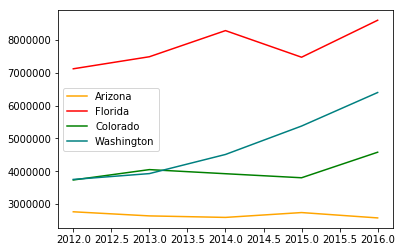

In [40]:
arizona_cash_securities,= plt.plot(x_axis, state_dfs["Arizona"]["Cash and securities"], label="Arizona", color="orange")
florida_cash_securities,= plt.plot(x_axis, state_dfs["Florida"]["Cash and securities"], label="Florida", color="red")
colorado_cash_securities,= plt.plot(x_axis, state_dfs["Colorado"]["Cash and securities"], label="Colorado", color="green")
washington_cash_securities,= plt.plot(x_axis, state_dfs["Washington"]["Cash and securities"], label="Washington", color="teal")

plt.legend(handles=[arizona_cash_securities,florida_cash_securities,colorado_cash_securities,washington_cash_securities])
plt.show()

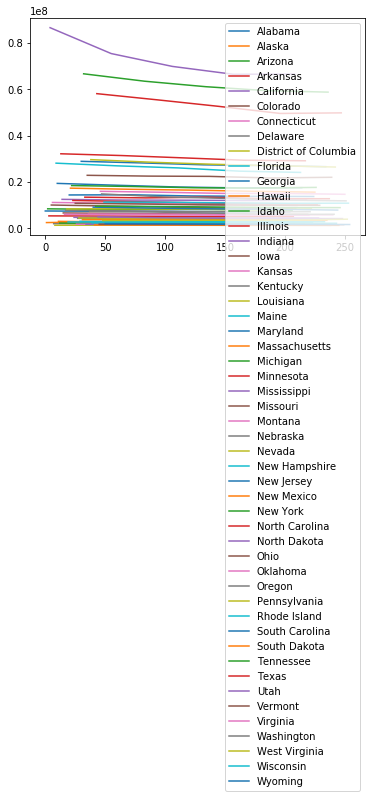

In [49]:
{state_dfs[state]["Total Revenue"].plot(label=state) for state in states_list}
plt.legend()